In [9]:
import numpy as np
from cs231n.classifiers.neural_net_own import TwoLayerNet
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])    
    return X, y

net = init_toy_model()
X, y = init_toy_data()

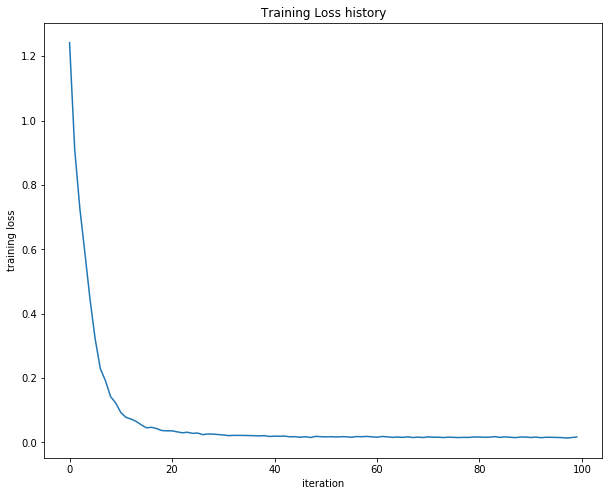

In [15]:
net = init_toy_model()
stats = net.train(X, y, X, y, learning_rate=1e-1, 
                  reg=5e-6, num_iters=100, verbose=False)
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

In [17]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_train=49000, num_validation=1000, num_test=1000):
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    
    try:
        del X_train, y_train
        del X_test, y_test
    except:
        pass
    
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
    
    mask = list(range(num_train, num_train + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    
    mask = list(range(num_train))
    X_train = X_train[mask]
    y_train = y_train[mask]
    
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]
    
    mean_img = np.mean(X_train, axis = 0)
    X_train -= mean_img
    X_val -= mean_img
    X_test -= mean_img
    
    X_train = np.reshape(X_train, (num_train, -1))
    X_val = np.reshape(X_val, (num_validation, -1))
    X_test = np.reshape(X_test, (num_test, -1))
    
    return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()

In [18]:
input_size = 3072
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

stats = net.train(X_train, y_train, X_val, y_val, 
                  num_iters=1000, batch_size=200, 
                  learning_rate=1e-4, learning_rate_decay=0.95,
                  reg=0.25, verbose=True)
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

iteration 0 / 1000: loss 2.302762
iteration 100 / 1000: loss 2.302358
iteration 200 / 1000: loss 2.297404
iteration 300 / 1000: loss 2.258897
iteration 400 / 1000: loss 2.202975
iteration 500 / 1000: loss 2.116816
iteration 600 / 1000: loss 2.049789
iteration 700 / 1000: loss 1.985711
iteration 800 / 1000: loss 2.003726
iteration 900 / 1000: loss 1.948076
Validation accuracy:  0.287


In [ ]:
best_net = None

hidden_size = [75, 100, 125]
learning_rate = np.array([0.7, 0.8, 0.9, 1.0, 1.1])*1e-3
regularzation_strengths = [0.75, 1, 1.25]
